# Model Validation with Scikit Learn

## sample size: 20,000

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

path = '../../datasets/joint_positions_20_000.csv'

data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         20000 non-null  float64
 1   y         20000 non-null  float64
 2   pitch     20000 non-null  float64
 3   shoulder  20000 non-null  float64
 4   elbow     20000 non-null  float64
 5   wrist     20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


In [7]:
from sklearn.model_selection import train_test_split

X = data[['x','y','pitch']].to_numpy()
y = data[['shoulder','elbow','wrist']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='tanh',
    max_iter=5000,
    warm_start=True
)

model.fit(X_train, y_train)

/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', max_iter=20, warm_start=True)

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test, y_test, cv=8, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -scores)  # Negate scores to get MSE
# Print the mean and standard deviation of the scores
print("Mean MSE:", -scores.mean())
print("Std. dev. of MSE:", scores.std())

/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/xavier/miniconda3/lib/python3.

Cross-validation scores: [0.85854704 0.94496179 0.91956636 0.90400273 0.86278042 0.9247879
 0.89362882 0.92074574]
Mean MSE: 0.9036276018810621
Std. dev. of MSE: 0.028513624098911998


/home/xavier/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## Visualizing 1000 Samples

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

path = '../../datasets/joint_positions_data_1000.csv'

data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         1000 non-null   float64
 1   y         1000 non-null   float64
 2   pitch     1000 non-null   float64
 3   shoulder  1000 non-null   float64
 4   elbow     1000 non-null   float64
 5   wrist     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


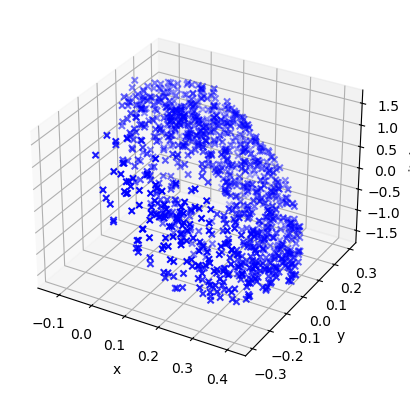

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    data['x'].values,
    data['y'].values,
    data['pitch'].values,
    marker='x',
    color='blue'
)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('pitch')

plt.show()